In [19]:
# Import libraries
import os
from torch.utils.data import DataLoader,Dataset, random_split, Subset
from skimage import io, transform
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset

# Define the device and data repository
device = 'cpu'

In [3]:
class XrayDataset(Dataset):

    def __init__(self, image_dir):
        """Initialize the attributes of the object of the class."""
        self.image_dir = image_dir
        self.image_path_list = sorted(self._find_files(image_dir))
        self.classes = self._get_class()
        self.class_to_idx  = self._get_class_index()

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.image_path_list)

    def __getitem__(self, index):
        """Return a data sample (=image) for a given index, along with the name of the corresponding pokemon."""
        
        # TO DO:
        # - get the image path corresponding to 'index' (use the list 'self.image_path_list')
        # - get the pokemon name
        # - load the image into a numpy array x
        # - transform x into a pytorch tensor of type 'float'
        # - return the tensor x and the pokemon name
        image_path = self.image_path_list[index]
        label = image_path.split('/')[-2]
        label = self.class_to_idx[label]
        x = io.imread(image_path)
        x = torch.tensor(x, dtype=float)
        
        return x, label

    def _find_files(self, directory, pattern='*.jpeg'):
        """Recursively find all files matching the pattern."""
        image_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                image_path_list.append(os.path.join(root, filename))
        return image_path_list
    
    def _get_class(self):
        classes = []
        for path in self.image_path_list:
            class_image = path.split('/')[2]
            if class_image not in classes:
                classes.append(class_image)
        return classes
    
    def _get_class_index(self):
        idx_to_class = {i:j for i, j in enumerate(self.classes)}
        class_to_idx = {value:key for key,value in idx_to_class.items()}
        return class_to_idx

In [5]:
# We can initialize the dataset by providing the directory of the image corpus data
image_dir = 'Dataset/train'
dataset = XrayDataset(image_dir=image_dir)

# You can use the '_find_files' method to get the list of images paths
image_path_list = dataset._find_files(image_dir)

# Equivalently, since this list is stored as an inner attribute, you can access it directly:
image_path_list = dataset.image_path_list

# Display all file paths
for l in image_path_list:
    print(l)
print('Number of images in the list', len(image_path_list))

Dataset/train/NORMAL/IM-0115-0001.jpeg
Dataset/train/NORMAL/IM-0117-0001.jpeg
Dataset/train/NORMAL/IM-0119-0001.jpeg
Dataset/train/NORMAL/IM-0122-0001.jpeg
Dataset/train/NORMAL/IM-0125-0001.jpeg
Dataset/train/NORMAL/IM-0127-0001.jpeg
Dataset/train/NORMAL/IM-0128-0001.jpeg
Dataset/train/NORMAL/IM-0129-0001.jpeg
Dataset/train/NORMAL/IM-0131-0001.jpeg
Dataset/train/NORMAL/IM-0133-0001.jpeg
Dataset/train/NORMAL/IM-0135-0001.jpeg
Dataset/train/NORMAL/IM-0137-0001.jpeg
Dataset/train/NORMAL/IM-0140-0001.jpeg
Dataset/train/NORMAL/IM-0141-0001.jpeg
Dataset/train/NORMAL/IM-0143-0001.jpeg
Dataset/train/NORMAL/IM-0145-0001.jpeg
Dataset/train/NORMAL/IM-0147-0001.jpeg
Dataset/train/NORMAL/IM-0149-0001.jpeg
Dataset/train/NORMAL/IM-0151-0001.jpeg
Dataset/train/NORMAL/IM-0152-0001.jpeg
Dataset/train/NORMAL/IM-0154-0001.jpeg
Dataset/train/NORMAL/IM-0156-0001.jpeg
Dataset/train/NORMAL/IM-0158-0001.jpeg
Dataset/train/NORMAL/IM-0160-0001.jpeg
Dataset/train/NORMAL/IM-0162-0001.jpeg
Dataset/train/NORMAL/IM-0

torch.Size([784, 1176])


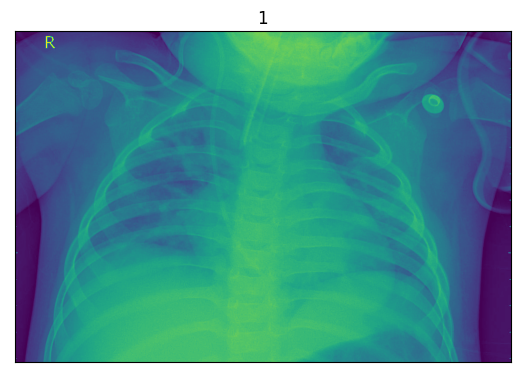

In [6]:
im, name = dataset.__getitem__(-1)
im, name = dataset[-1]
print(im.shape)

# To plot it, convert it back as integer
im = im.int()
plt.figure()
plt.imshow(im)
plt.title(name)
plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
train_dir = 'Dataset/train'
val_dir = 'Dataset/val'
test_dir = 'Dataset/test'
train_data = XrayDataset(image_dir=train_dir)
val_data = XrayDataset(image_dir=val_dir)
test_data = XrayDataset(image_dir=test_dir)

In [8]:
# Set the batch size (=number of samples/images in each batch) and create the dataloader
batch_size = 5
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [13]:
train_dataloader

In [18]:
# Get a batch of images from the train dataloader and print it
dataiter = iter(train_dataloader)
image_batch_example = dataiter.next()[0]
# for ip in range(batch_size):
#     plt.figure()
#     plt.imshow(image_batch_example[ip, :].squeeze().detach().numpy(), cmap='gray')
#     plt.show()

RuntimeError: stack expects each tensor to be equal size, but got [816, 1216] at entry 0 and [984, 1320] at entry 1

In [12]:
image = next(iter(train_dataloader))
# print(image[0].shape)

RuntimeError: stack expects each tensor to be equal size, but got [944, 1336] at entry 0 and [840, 1256] at entry 1

## Define parameters

In [ ]:
# To create the convolution function, we specify:
# - the number of input channels (= the depth of the input image, usually 1 for black and white images, and 3 for RGB color images
# - the number of output channels (which is equal to the number of kernels)
# - the kernel size (the dimension of the filter)
# - weather we use bias or not
num_channels_in = 1
num_channels_out = 1
kernel_size = 2
my_conv = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=kernel_size, bias=False)

# You can print the kernel weights: when using Conv2d, the weights are randomly initialized
print(my_conv.weight)

## CNN classifier

In [ ]:
# Define a CNN classifier module.

class CNNClassif(nn.Module):
    def __init__(self, num_channels1=16, num_channels2=32, num_classes=10):
        super(CNNClassif, self).__init__()
        
        # TO DO: define the convolutional layers 1 and 2 and the linear layer as above.
        self.cnn_layer1 = nn.Sequential(
            nn.Conv2d(1, num_channels1, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
            
        self.cnn_layer2 = nn.Sequential(
            nn.Conv2d(num_channels1, num_channels2, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.lin_layer = nn.Linear(7*7*num_channels2, num_classes)
        
    def forward(self, x):
        
        # TO DO: write the forward pass, which:
        # - applies the two cnn layers to produce feature maps
        # - vectorize the feature maps
        # - applies the linear layer
        out = self.cnn_layer1(x)
        out = self.cnn_layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.lin_layer(out)
        
        return out 

In [ ]:
# Instantiate the model
num_channels1 = 16
num_channels2 = 32
num_classes = 10
model = CNNClassif(num_channels1, num_channels2, num_classes)

# Print the total number of parameters in the model
print('Total number of parameters: ', sum(p.numel() for p in model.parameters()))

In [ ]:
#  Training function 

def training_cnn_classifier(model, train_dataloader, num_epochs, loss_fn, learning_rate, device='cpu', verbose=True):

    # Set the model
    model = model.to(device)
    model.train()
    
    # define the optimizer (SGD)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    # Initialize a list to save the training loss over epochs
    loss_total = []
    
    # Training loop
    for epoch in range(num_epochs):
        loss_current_epoch = 0
        for batch_index, (images, labels) in enumerate(train_dataloader):
            # copy images and labels to the device
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            y_predicted = model(images)
            loss = loss_fn(y_predicted, labels)

            # backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Record the loss
            loss_current_epoch += loss.item()

        # At the end of each epoch, save the average loss over batches and display it
        loss_total.append(loss_current_epoch)
        if verbose:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss_current_epoch))
        
    return model, loss_total

In [ ]:
# Optimizer
num_epochs = 20
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001

# Training
model, loss_total = training_cnn_classifier(model, train_dataloader, num_epochs, loss_fn, learning_rate, device='cpu', verbose=True)

# Save the model and display the loss over epochs
torch.save(model.state_dict(), 'model_cnn_classif.pt')
plt.plot(loss_total)
plt.show()

In [ ]:
# Eval function

def eval_cnn_classifier(model, eval_dataloader, device):

    # Prepare the model (copy to device and disable some layers (batch norm, dropout...) when evaluating
    model.to(device)
    model.eval() 

    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        # initialize the total and correct number of labels to compute the accuracy
        correct = 0
        total = 0
        for images, labels in eval_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            y_predicted = model(images)
            _, label_predicted = torch.max(y_predicted.data, 1)
            total += labels.size(0)
            correct += (label_predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    
    return accuracy

In [ ]:
# Evaluate the model on the test set (instantiate the model, load the trained parameters and use the
# evaluation function). Display the accuracy on the test set.

model = CNNClassif(num_channels1, num_channels2, num_classes)
model.load_state_dict(torch.load('model_cnn_classif.pt'))
accuracy = eval_cnn_classifier(model, test_dataloader, device)
print('Accuracy of the network on the test images: ', accuracy, '%')